In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = '#f8f9fa'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

COLORS = {
    'Deceased': '#e74c3c',  # Professional red
    'Living': '#27ae60'      # Professional green
}

In [ ]:
df = pd.read_csv('./PDAC_data/clinical_data.csv')
df.drop(["histology_diagnosis", "additiol_pathologic_findings", "cause_of_death"], axis=1, inplace=True)
df.head(5) 

,case_id,age,sex,race,participant_country,tumor_site,tumor_size_cm,tumor_necrosis,lymph_vascular_invasion,perineural_invasion,...,pathologic_staging_distant_metastasis_pm,clinical_staging_distant_metastasis_cm,residual_tumor,tumor_stage_pathological,bmi,alcohol_consumption,tobacco_smoking_history,follow_up_days,vital_status,is_this_patient_lost_to_follow_up
0,C3L-00017,69,Male,White,United States,head,4.5,Not identified,Not identified,Present,...,pMX,cMX,RX: Presence of residual tumor cannot be asse...,Stage IIA,28.36,Alcohol consumption equal to or less than 2 dr...,Current reformed smoker within past 15 years,426.0,Living,Yes
1,C3L-00102,42,Male,White,United States,head,3.0,Not identified,Present,Present,...,pMX,cM0,R0: No residual tumor,Stage III,26.93,Alcohol consumption history not available,Lifelong non-smoker: Less than 100 cigarettes ...,249.0,Deceased,No
2,C3L-00189,68,Female,NaN,Cada,head,2.7,Not identified,Not identified,Present,...,pM0,cM0,R1: Microscopic residual tumor,Stage IIB,34.28,Alcohol consumption equal to or less than 2 dr...,"Current reformed smoker, more than 15 years",1035.0,Deceased,No
3,C3L-00277,69,Male,White,Other,tail,5.0,Not identified,Not identified,Present,...,pMX,cMX,R2: Macroscopic residual tumor,Stage IIB,24.00,Alcohol consumption equal to or less than 2 dr...,Lifelong non-smoker: Less than 100 cigarettes ...,610.0,Deceased,Yes
4,C3L-00401,62,Female,NaN,Cada,body,2.8,Not identified,Present,Present,...,pM0,cM0,R0: No residual tumor,Stage IIB,22.42,Alcohol consumption equal to or less than 2 dr...,Lifelong non-smoker: Less than 100 cigarettes ...,1228.0,Living,No


In [3]:
df.vital_status.value_counts()

vital_status
Deceased    77
Living      59
Name: count, dtype: int64

In [15]:
df.isnull().mean()[
    df.isnull().mean() > 0
].sort_values(ascending=False)

race                                 0.764286
tumor_stage_pathological             0.042857
follow_up_days                       0.035714
vital_status                         0.028571
is_this_patient_lost_to_follow_up    0.028571
tumor_site                           0.014286
tumor_size_cm                        0.014286
tumor_necrosis                       0.014286
lymph_vascular_invasion              0.014286
perineural_invasion                  0.014286
residual_tumor                       0.014286
bmi                                  0.014286
alcohol_consumption                  0.014286
tobacco_smoking_history              0.014286
dtype: float64

In [16]:
df = df.dropna(subset=['follow_up_days', 'vital_status', 'tumor_stage_pathological'])
df['race'] = df['race'].fillna('Unknown') 
print("Number of missing values after processing:", df.isna().sum().sum())

Number of missing values after processing: 0


In [17]:
df['tobacco_smoking_history'] = df['tobacco_smoking_history'].map({
    'Current reformed smoker within past 15 years': 'Stopped <15 years',
    'Lifelong non-smoker: Less than 100 cigarettes smoked in lifetime': 'Never',
    'Current reformed smoker, more than 15 years': 'Stopped >15 years',
    'Current smoker: Includes daily and non-daily smokers': 'Smoking',
    'Smoking history not available': 'Unknown',
    'Current reformed smoker, years unknown': 'Unknown'
})

df['alcohol_consumption'] = df['alcohol_consumption'].map({
    'Alcohol consumption equal to or less than 2 drinks per day for men and 1 drink or less per day for women': 'Low',
    'Alcohol consumption history not available': 'Unknown',
    'Alcohol consumption more than 2 drinks per day for men and more than 1 drink per day for women': 'High',
    'Lifelong non-drinker': 'Never',
    'Consumed alcohol in the past, but currently a non-drinker': 'Stopped'
})

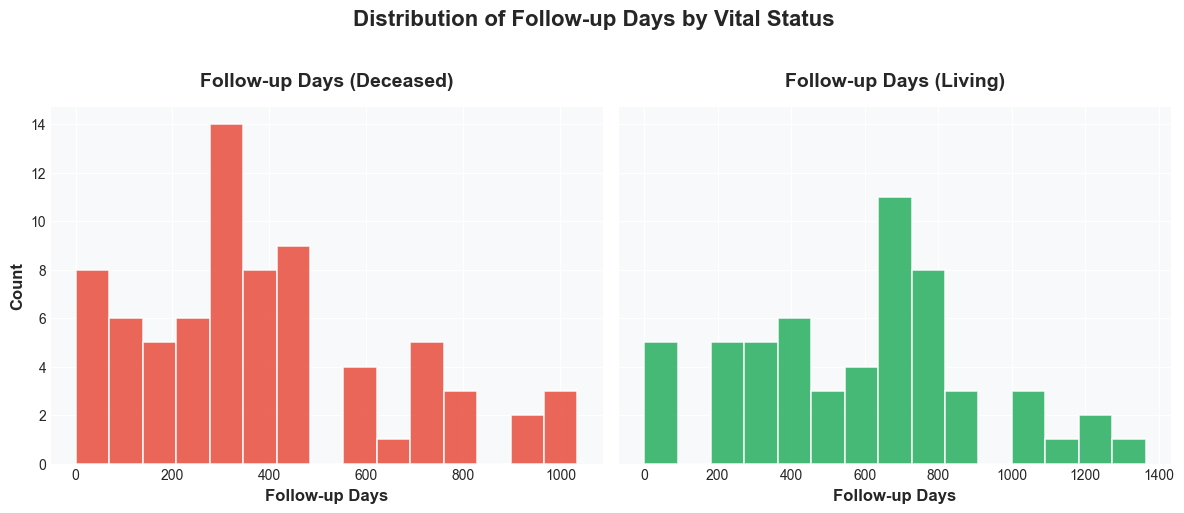

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

deceased_data = df[df.vital_status == 'Deceased']['follow_up_days']
living_data = df[df.vital_status == 'Living']['follow_up_days']

axes[0].hist(
    deceased_data,
    color=COLORS['Deceased'], 
    bins=15,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.85
)
axes[0].set_title('Follow-up Days (Deceased)', pad=15)
axes[0].set_xlabel('Follow-up Days', fontweight='semibold')
axes[0].set_ylabel('Count', fontweight='semibold')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[1].hist(
    living_data,
    color=COLORS['Living'], 
    bins=15,
    edgecolor='white',
    linewidth=1.2,
    alpha=0.85
)
axes[1].set_title('Follow-up Days (Living)', pad=15)
axes[1].set_xlabel('Follow-up Days', fontweight='semibold')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

fig.suptitle(
    'Distribution of Follow-up Days by Vital Status', 
    fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

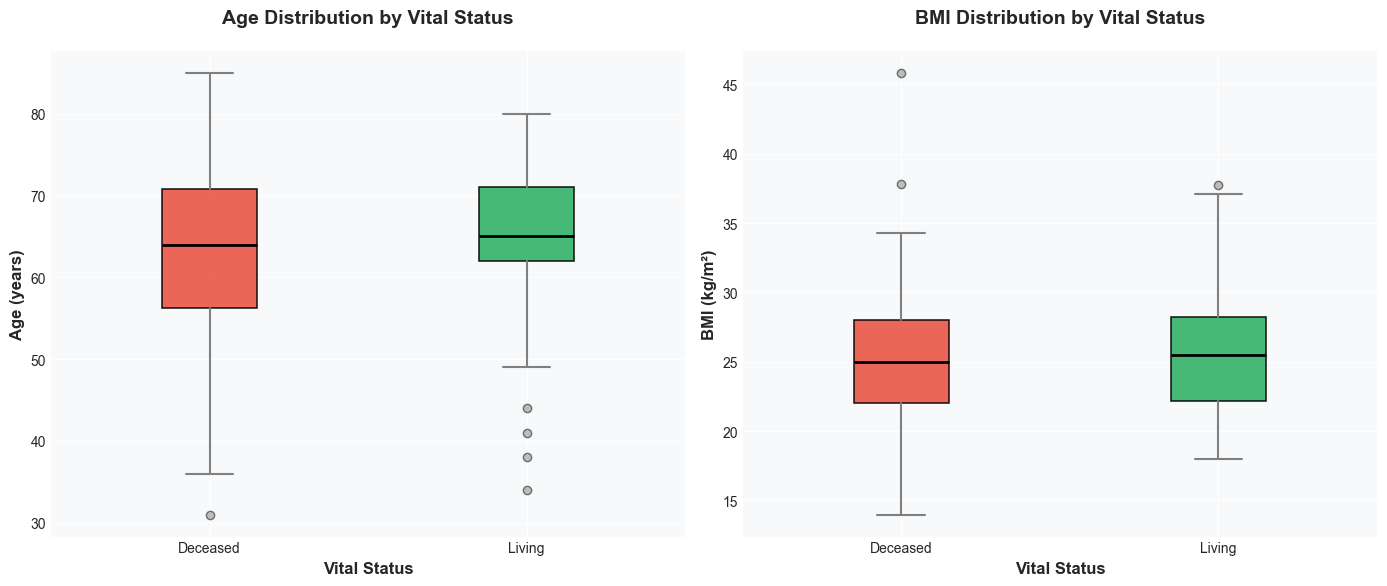

In [29]:
labels = ['Deceased', 'Living']

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Age boxplot
deceased_age = df['age'].groupby(df['vital_status']).get_group('Deceased')
living_age = df['age'].groupby(df['vital_status']).get_group('Living')
bplot_age = axes[0].boxplot(
    [deceased_age, living_age],
    patch_artist=True,
    tick_labels=labels,
    widths=0.3,
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='gray', linewidth=1.5),
    capprops=dict(color='gray', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='gray', markersize=6, alpha=0.5)
)
for patch, label in zip(bplot_age['boxes'], labels):
    patch.set_facecolor(COLORS[label])
    patch.set_alpha(0.85)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
axes[0].set_ylabel('Age (years)', fontweight='semibold')
axes[0].set_xlabel('Vital Status', fontweight='semibold')
axes[0].set_title('Age Distribution by Vital Status', pad=20, fontweight='bold')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# BMI boxplot
deceased_bmi = df['bmi'].groupby(df['vital_status']).get_group('Deceased')
living_bmi = df['bmi'].groupby(df['vital_status']).get_group('Living')
bplot_bmi = axes[1].boxplot(
    [deceased_bmi, living_bmi],
    patch_artist=True,
    tick_labels=labels,
    widths=0.3,
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='gray', linewidth=1.5),
    capprops=dict(color='gray', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='gray', markersize=6, alpha=0.5)
)
for patch, label in zip(bplot_bmi['boxes'], labels):
    patch.set_facecolor(COLORS[label])
    patch.set_alpha(0.85)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
axes[1].set_ylabel('BMI (kg/m²)', fontweight='semibold')
axes[1].set_xlabel('Vital Status', fontweight='semibold')
axes[1].set_title('BMI Distribution by Vital Status', pad=20, fontweight='bold')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

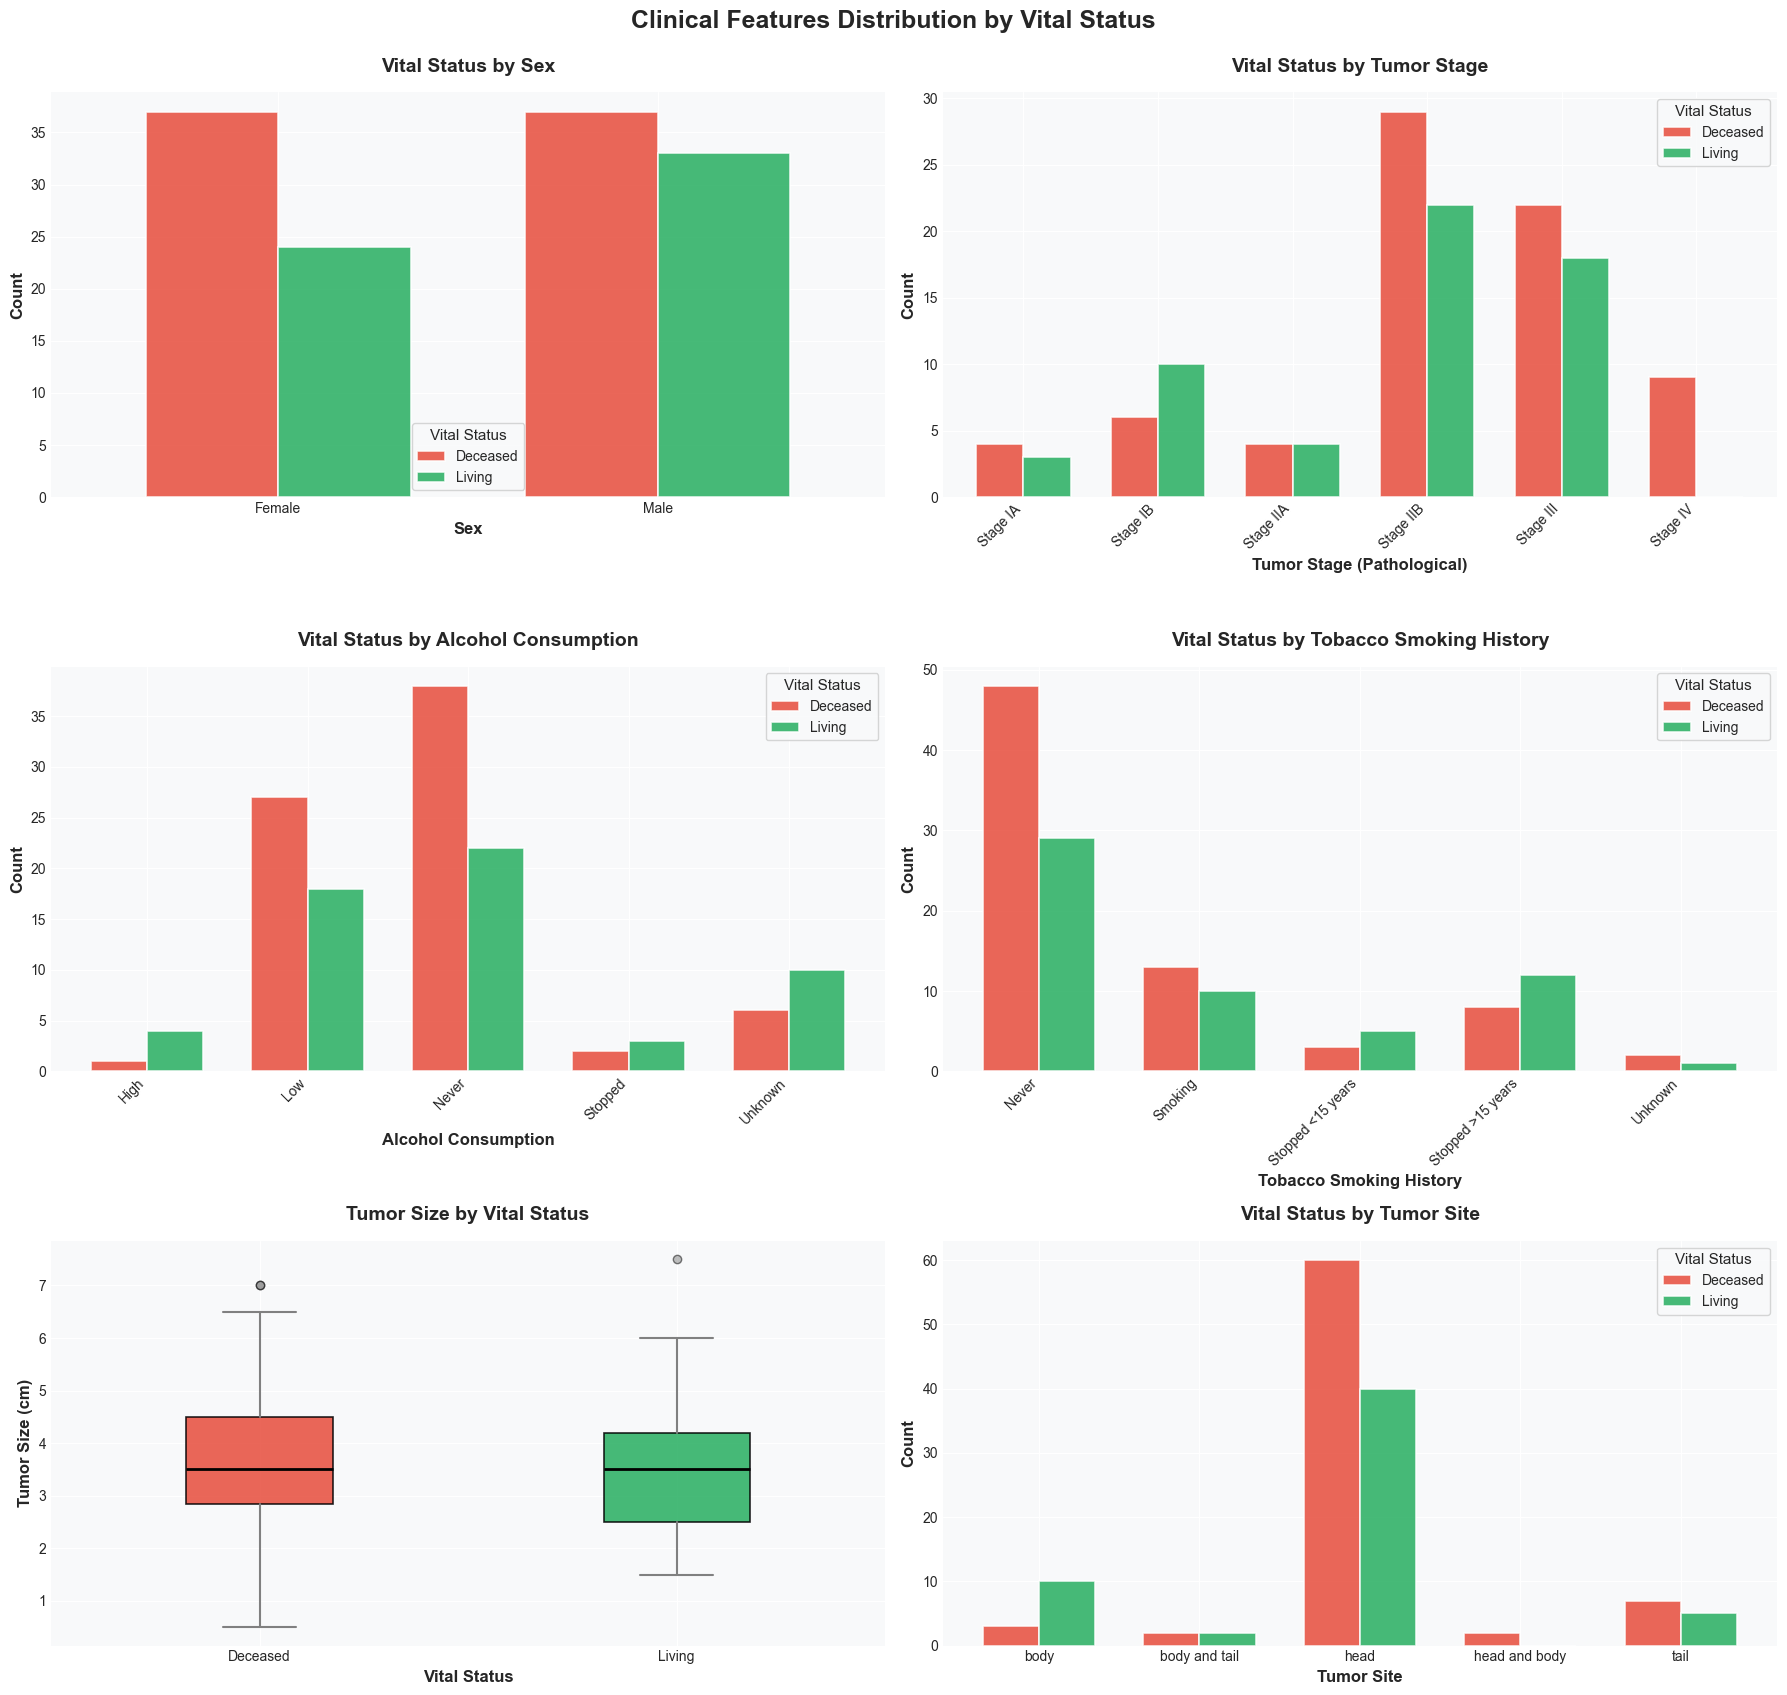

In [32]:
sex_vs_vital = df.groupby(['sex', 'vital_status']).size().unstack(fill_value=0)
stage_vs_vital = df.groupby(['tumor_stage_pathological', 'vital_status']).size().unstack(fill_value=0)
alcohol_vs_vital = df.groupby(['alcohol_consumption', 'vital_status']).size().unstack(fill_value=0)
tobacco_vs_vital = df.groupby(['tobacco_smoking_history', 'vital_status']).size().unstack(fill_value=0)
tumor_site_vs_vital = df.groupby(['tumor_site', 'vital_status']).size().unstack(fill_value=0)

fig, axes = plt.subplots(3, 2, figsize=(18, 17))

bar_colors = [COLORS['Deceased'], COLORS['Living']]
bar_width = 0.7
alpha_val = 0.85

sex_vs_vital.plot(
    kind='bar',
    color=bar_colors,
    ax=axes[0, 0],
    legend=False,
    width=bar_width,
    alpha=alpha_val,
    edgecolor='white',
    linewidth=1.2
)
axes[0, 0].set_xlabel('Sex', fontweight='semibold')
axes[0, 0].set_ylabel('Count', fontweight='semibold')
axes[0, 0].set_title('Vital Status by Sex', pad=15, fontweight='bold')
axes[0, 0].set_xticklabels(sex_vs_vital.index, rotation=0)
axes[0, 0].legend(title='Vital Status', frameon=True, fancybox=True)
axes[0, 0].spines['top'].set_visible(False)
axes[0, 0].spines['right'].set_visible(False)

stage_vs_vital.plot(
    kind='bar',
    color=bar_colors,
    ax=axes[0, 1],
    legend=False,
    width=bar_width,
    alpha=alpha_val,
    edgecolor='white',
    linewidth=1.2
)
axes[0, 1].set_xlabel('Tumor Stage (Pathological)', fontweight='semibold')
axes[0, 1].set_ylabel('Count', fontweight='semibold')
axes[0, 1].set_title('Vital Status by Tumor Stage', pad=15, fontweight='bold')
axes[0, 1].set_xticklabels(stage_vs_vital.index, rotation=45, ha='right')
axes[0, 1].legend(title='Vital Status', frameon=True, fancybox=True)
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)

alcohol_vs_vital.plot(
    kind='bar',
    color=bar_colors,
    ax=axes[1, 0],
    legend=False,
    width=bar_width,
    alpha=alpha_val,
    edgecolor='white',
    linewidth=1.2
)
axes[1, 0].set_xlabel('Alcohol Consumption', fontweight='semibold')
axes[1, 0].set_ylabel('Count', fontweight='semibold')
axes[1, 0].set_title('Vital Status by Alcohol Consumption', pad=15, fontweight='bold')
axes[1, 0].set_xticklabels(alcohol_vs_vital.index, rotation=45, ha='right')
axes[1, 0].legend(title='Vital Status', frameon=True, fancybox=True)
axes[1, 0].spines['top'].set_visible(False)
axes[1, 0].spines['right'].set_visible(False)

tobacco_vs_vital.plot(
    kind='bar',
    color=bar_colors,
    ax=axes[1, 1],
    legend=False,
    width=bar_width,
    alpha=alpha_val,
    edgecolor='white',
    linewidth=1.2
)
axes[1, 1].set_xlabel('Tobacco Smoking History', fontweight='semibold')
axes[1, 1].set_ylabel('Count', fontweight='semibold')
axes[1, 1].set_title('Vital Status by Tobacco Smoking History', pad=15, fontweight='bold')
axes[1, 1].set_xticklabels(tobacco_vs_vital.index, rotation=45, ha='right')
axes[1, 1].legend(title='Vital Status', frameon=True, fancybox=True)
axes[1, 1].spines['top'].set_visible(False)
axes[1, 1].spines['right'].set_visible(False)

deceased_tumor_size = df.loc[df['vital_status'] == 'Deceased', 'tumor_size_cm']
living_tumor_size = df.loc[df['vital_status'] == 'Living', 'tumor_size_cm']
labels = ['Deceased', 'Living']
bplot_size = axes[2, 0].boxplot(
    [deceased_tumor_size.dropna(), living_tumor_size.dropna()],
    patch_artist=True,
    tick_labels=labels,
    widths=0.35,
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='gray', linewidth=1.5),
    capprops=dict(color='gray', linewidth=1.5),
    flierprops=dict(marker='o', markerfacecolor='gray', markersize=6, alpha=0.5)
)
for patch, label in zip(bplot_size['boxes'], labels):
    patch.set_facecolor(COLORS[label])
    patch.set_alpha(0.85)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
axes[2, 0].set_xlabel('Vital Status', fontweight='semibold')
axes[2, 0].set_ylabel('Tumor Size (cm)', fontweight='semibold')
axes[2, 0].set_title('Tumor Size by Vital Status', pad=15, fontweight='bold')
axes[2, 0].spines['top'].set_visible(False)
axes[2, 0].spines['right'].set_visible(False)

tumor_site_vs_vital.plot(
    kind='bar',
    color=bar_colors,
    ax=axes[2, 1],
    legend=False,
    width=bar_width,
    alpha=alpha_val,
    edgecolor='white',
    linewidth=1.2
)
axes[2, 1].set_xlabel('Tumor Site', fontweight='semibold')
axes[2, 1].set_ylabel('Count', fontweight='semibold')
axes[2, 1].set_title('Vital Status by Tumor Site', pad=15, fontweight='bold')
axes[2, 1].set_xticklabels(tumor_site_vs_vital.index, rotation=0)
axes[2, 1].legend(title='Vital Status', frameon=True, fancybox=True)
axes[2, 1].spines['top'].set_visible(False)
axes[2, 1].spines['right'].set_visible(False)

fig.suptitle('Clinical Features Distribution by Vital Status',
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [34]:
mrna_data = pd.read_csv('./PDAC_data/mRNA.csv') 

mrna_data.head()

,Unnamed: 0,C3L-03394,C3N-03428,C3L-02112,C3N-01719,C3N-03670,C3N-02998,C3N-03211,C3L-01052,C3N-00512,...,C3L-01031,C3N-01167,C3L-01971,C3L-02604,C3L-00277,C3L-01328,C3L-03639,C3N-04282,C3L-04072,C3L-02613
0,A1BG,6.692021,6.355394,7.369336,5.837855,6.273016,5.830226,6.233734,7.733062,6.940000,...,6.653944,6.335488,6.692975,5.487724,5.832438,5.165238,4.696418,6.159660,4.631532,5.574783
1,A1BG-AS1,7.525181,6.976172,6.951589,6.389844,6.824514,6.014028,5.901466,7.079053,6.497582,...,6.434122,5.755125,6.358555,5.442385,4.163636,4.850363,4.589423,6.123135,5.181857,5.145694
2,A1CF,10.042247,6.944645,8.976580,7.296482,9.392307,6.171279,9.314027,9.781720,8.428144,...,8.006891,10.655383,9.309662,6.352634,6.229405,6.955306,6.316519,5.874011,5.239291,5.494695
3,A2M,15.906459,14.685723,15.515414,15.727089,15.681951,15.336633,16.288986,15.810445,15.976326,...,14.254752,14.800383,15.445033,13.993919,14.378005,15.122700,13.721873,14.685338,14.399627,13.649681
4,A2M-AS1,9.210500,9.168838,8.150627,8.728630,8.546683,9.353477,8.343518,8.071802,8.391297,...,7.287581,6.889905,7.124159,5.886559,6.413674,6.579675,5.093670,6.592302,5.301245,5.533477


In [ ]:
clinical_cases = df.case_id.unique() 
mrna_cases = set(mrna_data.columns[1:])  
matching_cases = set(clinical_cases) & set(mrna_cases) 
mrna_data_filtered = mrna_data[['Unnamed: 0'] + list(matching_cases)]

mrna_data_filtered.shape, mrna_data.shape 

((28057, 129), (28057, 138))

In [ ]:
print(mrna_data_filtered.iloc[:, 1:].describe())

          C3N-02579     C3N-00957     C3N-01168     C3L-01036     C3L-01687  \
count  28057.000000  28057.000000  28057.000000  28057.000000  28057.000000   
mean       6.253205      6.273753      6.246904      6.354625      6.279792   
std        4.296934      4.343992      4.363717      4.301217      4.339854   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.914911      2.021158      1.990505      2.044587      1.999134   
50%        7.023362      7.173123      7.081137      7.306748      7.184240   
75%        9.967226      9.967226      9.967226      9.967226      9.967226   
max       20.699364     21.735566     21.890720     22.174264     21.392330   

          C3L-00819     C3N-01383     C3L-02604     C3N-01716     C3L-00928  \
count  28057.000000  28057.000000  28057.000000  28057.000000  28057.000000   
mean       6.201902      6.291278      6.130304      6.292088      6.221956   
std        4.370671      4.338496      4.395603    